In [7]:
import pandas as pd
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')

In [31]:
print(train_df.shape)

(891, 12)


In [33]:
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
missing_percentage=(train_df.isnull().sum()/len(train_df))*100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


<Figure size 1800x800 with 0 Axes>

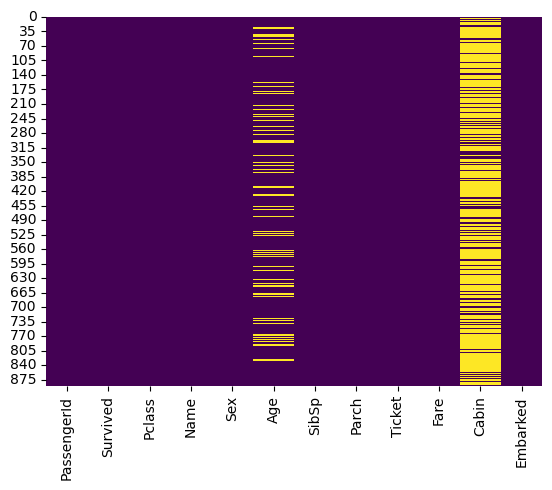

<Figure size 1800x800 with 0 Axes>

In [49]:
#visualizing missing data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train_df.isnull(),cmap='viridis',cbar=False)
plt.figure(figsize=(18,8))


In [55]:
#filling numeric values with mean and categorical values with 'unknown'
numerical_col=train_df.select_dtypes(include=['int64','float64']).columns
train_df[numerical_col]=train_df[numerical_col].fillna(train_df[numerical_col].mean())
categorical_col=train_df.select_dtypes(include='object').columns
train_df[categorical_col]=train_df[categorical_col].fillna('Unknown')

In [57]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [61]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [63]:
train_df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [65]:
train_df.to_csv('usedcleaned_dataset.csv',index=False)

<Axes: xlabel='Fare'>

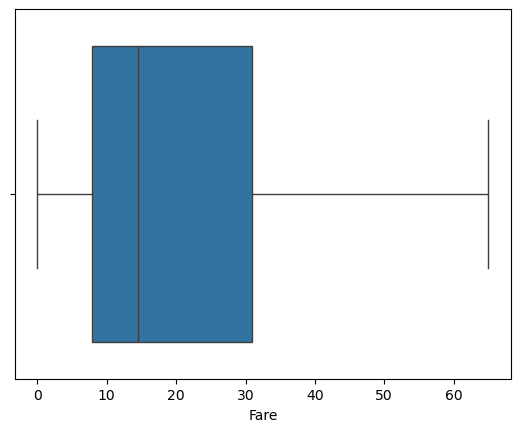

In [69]:
#visualization of outliers
sns.boxplot(x=train_df.Fare,showfliers=False)

<Axes: xlabel='Age'>

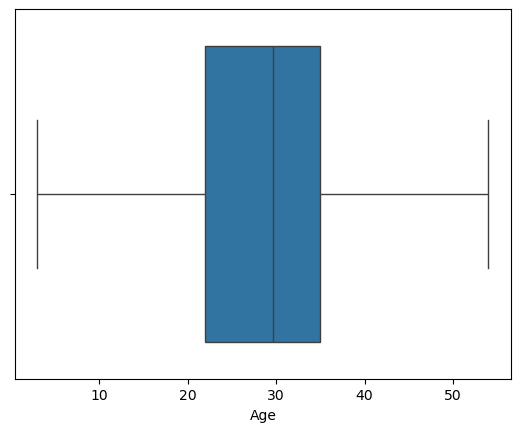

In [71]:
sns.boxplot(x=train_df.Age,showfliers=False)

In [89]:
#outliers for fare column
def remove_outliers_IQR(train_df,Fare,threshold=1.5):
    q1=train_df["Fare"].quantile(0.25)
    q3=train_df["Fare"].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-threshold*iqr
    upper_bound=q3+threshold*iqr
    return train_df[(train_df["Fare"]>=lower_bound) &(train_df["Fare"]<=upper_bound)]

In [91]:
columns_to_check=['Fare']
for col in columns_to_check:
    df1=remove_outliers_IQR(train_df,col)

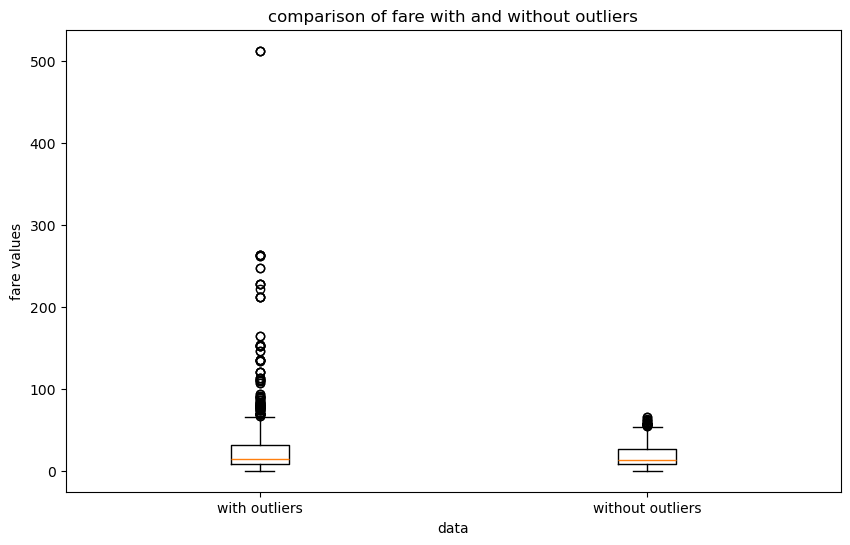

In [93]:
#comparison between with and without outliers in fare column
plt.figure(figsize=(10,6))
plt.boxplot([train_df['Fare'],df1['Fare']],labels=['with outliers','without outliers'])
plt.title('comparison of fare with and without outliers')
plt.xlabel('data')
plt.ylabel('fare values')
plt.show()

In [95]:
#outliers for Age column
def remove_outliers_IQR(train_df,Fare,threshold=1.5):
    q1=df1["Age"].quantile(0.25)
    q3=df1["Age"].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-threshold*iqr
    upper_bound=q3+threshold*iqr
    return df1[(df1["Age"]>=lower_bound) &(df1["Age"]<=upper_bound)]

columns_to_check=['Age']
for col in columns_to_check:
    df2=remove_outliers_IQR(df1,col)

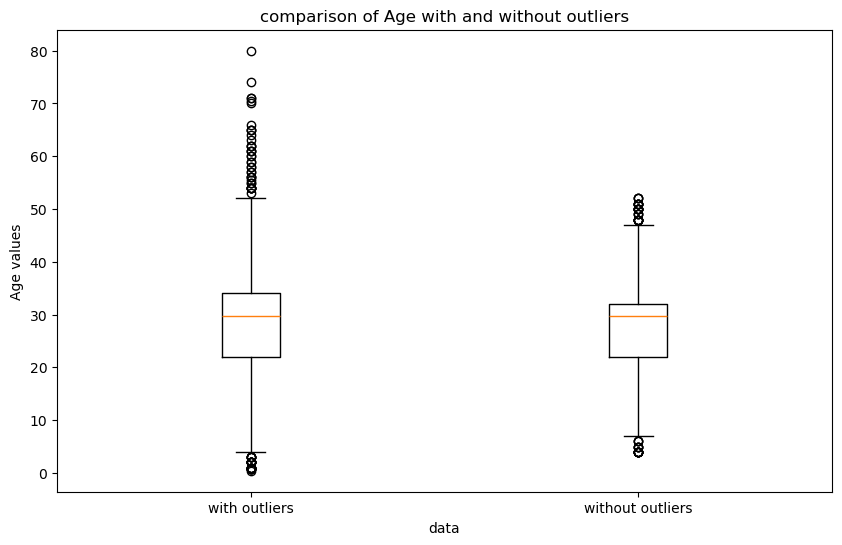

In [97]:
#comparison between with and without outliers in Age column
plt.figure(figsize=(10,6))
plt.boxplot([df1['Age'],df2['Age']],labels=['with outliers','without outliers'])
plt.title('comparison of Age with and without outliers')
plt.xlabel('data')
plt.ylabel('Age values')
plt.show()